In [4]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', 'UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble

In [10]:
config_path = "UCB_training/calpella_gage.yaml"
start_run(config_file=Path(config_path), gpu=-1)

2024-11-19 01:12:32,508: Logging to /Users/evanrobert/Documents/ESDL_Research/russian_river/UCB-USACE-LSTMs/neuralhydrology/runs/testing_run_1911_011232/output.log initialized.
2024-11-19 01:12:32,510: ### Folder structure created at /Users/evanrobert/Documents/ESDL_Research/russian_river/UCB-USACE-LSTMs/neuralhydrology/runs/testing_run_1911_011232
2024-11-19 01:12:32,510: ### Run configurations for testing_run
2024-11-19 01:12:32,510: experiment_name: testing_run
2024-11-19 01:12:32,511: train_basin_file: UCB_training/calpella
2024-11-19 01:12:32,511: validation_basin_file: UCB_training/calpella
2024-11-19 01:12:32,511: test_basin_file: UCB_training/calpella
2024-11-19 01:12:32,512: train_start_date: 1994-10-01 00:00:00
2024-11-19 01:12:32,512: train_end_date: 2005-09-30 00:00:00
2024-11-19 01:12:32,513: validation_start_date: 2005-10-01 00:00:00
2024-11-19 01:12:32,513: validation_end_date: 2009-09-30 00:00:00
2024-11-19 01:12:32,513: device: cpu
2024-11-19 01:12:32,514: validate_eve

In [11]:
# change directory to directory specified by the first line of the output of above cell

run_dir = Path("/Users/evanrobert/Documents/ESDL_Research/russian_river/UCB-USACE-LSTMs/neuralhydrology/runs/testing_run_1911_011232")

eval_run(run_dir=run_dir, period="validation")

2024-11-19 01:15:08,227: Using the model weights from /Users/evanrobert/Documents/ESDL_Research/russian_river/UCB-USACE-LSTMs/neuralhydrology/runs/testing_run_1911_011232/model_epoch032.pt
# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]
2024-11-19 01:15:09,023: Stored metrics at /Users/evanrobert/Documents/ESDL_Research/russian_river/UCB-USACE-LSTMs/neuralhydrology/runs/testing_run_1911_011232/validation/model_epoch032/validation_metrics.csv
2024-11-19 01:15:09,024: Stored results at /Users/evanrobert/Documents/ESDL_Research/russian_river/UCB-USACE-LSTMs/neuralhydrology/runs/testing_run_1911_011232/validation/model_epoch032/validation_results.p


In [12]:
with open(run_dir / "validation" / "model_epoch032" / "validation_results.p", "rb") as fp:
    results = pickle.load(fp)
    
results['Calpella']['1D']['xr']

<xarray.Dataset>
Dimensions:                       (date: 1461, time_step: 1)
Coordinates:
  * date                          (date) datetime64[ns] 2005-10-01 ... 2009-0...
  * time_step                     (time_step) int64 0
Data variables:
    NR CALPELLA FLOW COE CPL_obs  (date, time_step) float32 184.2 178.0 ... nan
    NR CALPELLA FLOW COE CPL_sim  (date, time_step) float32 145.5 ... 113.1

Text(0.5, 1.0, 'Calpella Gage Validation period - NSE 0.780')

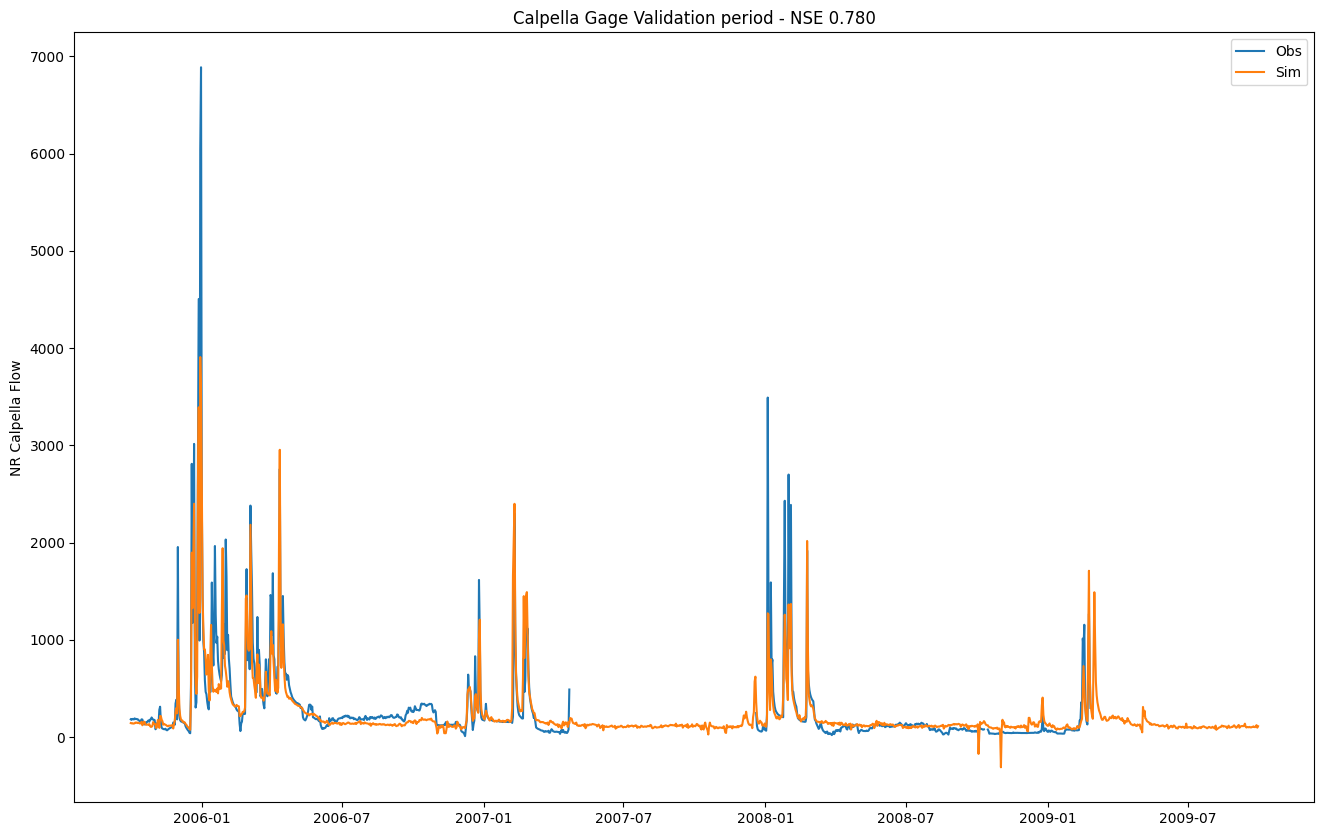

In [14]:

# extract observations and LSTM simulations
qobs = results['Calpella']['1D']['xr']['NR CALPELLA FLOW COE CPL_obs']
qsim = results['Calpella']['1D']['xr']['NR CALPELLA FLOW COE CPL_sim']

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(qobs["date"], qobs, label="Obs")
ax.plot(qsim["date"], qsim, label="Sim")
ax.set_ylabel("NR Calpella Flow")
ax.legend()
ax.set_title(f"Calpella Gage Validation period - NSE {results['Calpella']['1D']['NSE']:.3f}")

In [ ]:
def load_russian_river_data(data_dir: Path) -> pd.DataFrame:
    data_dir = Path("/Users/evanrobert/Documents/ESDL_Research/russian_river/russian_river_data_folder/")
    df = pd.read_csv(data_dir / 'daily.csv')
    df.columns = df.iloc[0]
    df = df[3:]
    df = df.drop("   Ordinate", axis=1)
    df = df.rename(columns={'   Date': 'Date', '   Time': 'Time'})
    df['Time'] = df['Time'].replace('24:00:00', '00:00:00')
    df['Datetime'] = pd.to_datetime(df['Date'], format='%d-%b-%y') + pd.to_timedelta(df['Time'])
    df.set_index('Datetime', inplace=True)
    return df

In [ ]:
load_russian_river_data(None)

In [ ]:
import sys
import os 

library_path = os.path.join('..', '..', '..', 'UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from UCB_train import UCB_trainer
from pathlib import Path
import matplotlib.pyplot as plt
from neuralhydrology.evaluation.metrics import calculate_all_metrics

In [ ]:
path_to_csv = Path('/Users/evanrobert/Documents/ESDL_Research/russian_river/UCB-USACE-LSTMs/neuralhydrology/UCB_training')
params = {'learning_rate': 0.001, 'batch_size': 256, 'epochs': 1, 'validate_every': 1, 'save_weights_every': 1}
num_ensemble_members = 1
trainer = UCB_trainer(path_to_csv, params, num_ensemble_members=num_ensemble_members, physics_informed=True)

In [ ]:
trainer.train()

In [ ]:
trainer.results()

In [ ]:
trainer._plot_day_of_year_average()

In [ ]:
trainer._plot_month_of_year_average()

In [ ]:
# .311

In [ ]:
path_to_csv = Path('/Users/canruso/Desktop/UCB-USACE-LSTMs/neuralhydrology/UCB_training')
params = {'learning_rate': 0.001, 'batch_size': 256, 'epochs': 1, 'validate_every': 1, 'save_weights_every': 1}
num_ensemble_members = 2
trainer = UCB_trainer(path_to_csv, params, num_ensemble_members)

In [ ]:
trainer.train()

In [ ]:
trainer.results()

In [ ]:
trainer._plot_day_of_year_average()

In [ ]:
trainer._plot_month_of_year_average()

In [ ]:
new_dynamic_inputs = [
    "MF_TuleR_S10ET-POTENTIAL",
    "MF_TuleR_S10FLOW",
    "MF_TuleR_S10PRECIP-INC"
]

In [ ]:
trainer._config.update_config(yml_path_or_dict=params, new_dynamic_inputs=new_dynamic_inputs)

In [ ]:
trainer.train()

In [ ]:
trainer.results()

In [ ]:
print("Dynamic Inputs used for training:", trainer._config.as_dict().get("dynamic_inputs"))